<a href="https://colab.research.google.com/github/dengliu/s3-benchmark/blob/master/Analysis_of_S3_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload the Starrocks snapshot file size stats file


In [ ]:
# Upload the Starrocks snapshot file size stats file
from google.colab import files

uploaded = files.upload()


Saving s3bench-2.csv-m6a.4xlarge to s3bench-2.csv-m6a.4xlarge


# Verify the fize size stats are uploaded correctly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import io
 
 # Verify the fize size stats are uploaded correctly
df = pd.read_csv(io.BytesIO(uploaded['s3bench-2.csv-m6a.4xlarge']))
print(df)

     i-029def35e70f6cbb8  m6a.4xlarge      1024   1     0.066  14.7  11.0  \
0    i-029def35e70f6cbb8  m6a.4xlarge      1024   2     0.144  13.5  10.3   
1    i-029def35e70f6cbb8  m6a.4xlarge      1024   3     0.217  13.3   9.4   
2    i-029def35e70f6cbb8  m6a.4xlarge      1024   4     0.279  13.8  10.2   
3    i-029def35e70f6cbb8  m6a.4xlarge      1024   5     0.370  13.1   9.2   
4    i-029def35e70f6cbb8  m6a.4xlarge      1024   6     0.432  13.4   9.7   
..                   ...          ...       ...  ..       ...   ...   ...   
762  i-029def35e70f6cbb8  m6a.4xlarge  33554432  44  1424.375  18.1  11.2   
763  i-029def35e70f6cbb8  m6a.4xlarge  33554432  45  1423.618  19.2  11.8   
764  i-029def35e70f6cbb8  m6a.4xlarge  33554432  46  1422.908  19.6  12.2   
765  i-029def35e70f6cbb8  m6a.4xlarge  33554432  47  1423.378  19.8  12.4   
766  i-029def35e70f6cbb8  m6a.4xlarge  33554432  48  1462.520  21.0  13.0   

     12.1  13.5  15.6  ...  43.2  43.2.1    14.76   11.05   12.2  13.5.1  \

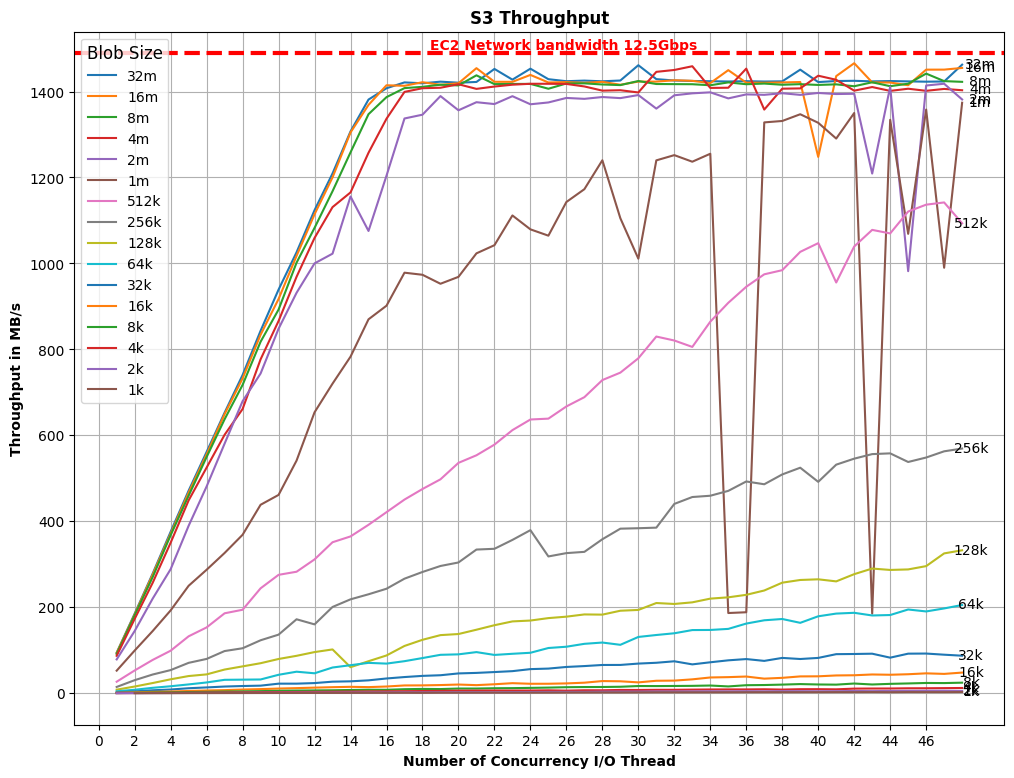

In [44]:
# Extract the required columns
x = df.iloc[:, 3]  # 4th column
y = df.iloc[:, 4]  # 5th column

# Get unique values of the 4th column for legends, divide by 1024, and sort in reverse order
legends = df.iloc[:, 2].unique()  # 3rd column
legends = sorted(legends / 1024, reverse=True)

# Create a line plot for each unique value of the 4th column
fig, ax = plt.subplots(figsize=(12, 9))  # Adjust the figure size as desired
lines = []
for legend in legends:
    mask = df.iloc[:, 2] == (legend * 1024)
    legend_label = str(int(legend)) + 'k' if legend < 1024 else str(int(legend / 1024)) + 'm'
    line, = ax.plot(x[mask], y[mask], label=legend_label)
    lines.append(line)

    # Add the value of the legend near the end of the line
    x_pos = x[mask].values[-1]
    y_pos = y[mask].values[-1]
    offset_x = 0.5 if legend < 1024 else 1  # Adjust the x-offset based on legend value
    offset_y = 0.5 if legend < 1024 else 1  # Adjust the y-offset based on legend value
    ax.text(x_pos + offset_x, y_pos + offset_y, legend_label, ha='center', va='center')

# Add a horizontal line at y = 1490. This is the upper limit of the EC2 Network bandwidth 12.5Gbps
ax.axhline(y=1490, color='red', linestyle='--', linewidth=3)

# Add a text annotation for the horizontal line
x_range = ax.get_xlim()  # Get the x-axis data range
x_text = (x_range[1] - x_range[0]) / 2  # Calculate the x-coordinate for the text
ax.text(x_text, 1490, 'EC2 Network bandwidth 12.5Gbps', color='red', ha='center', va='bottom', fontweight='bold')

# Set the y-axis ticks
x_ticks = np.arange(0, 48, 2)
ax.set_xticks(x_ticks)

# Set x and y axis labels
ax.set_xlabel('Number of Concurrency I/O Thread', fontweight='bold')
ax.set_ylabel('Throughput in MB/s', fontweight='bold')

# Add legends and show the plot
ax.legend(lines, [line.get_label() for line in lines], title='Blob Size', title_fontsize='large')
plt.grid(True)
plt.title('S3 Throughput', fontweight='bold')  # Add the title for the chart

plt.show()